### NOTE: Here is the link to my data files because they are too big and cannot be uploaded to GitHub: [Here](https://drive.google.com/drive/folders/1XXj50vQlc_ACTqfhcPPMnrXG-h2w1Gdk?usp=drive_link)

# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up environment

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

In [47]:
!pip install numpy
!pip install pandas

Import the core data science libraries:

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [49]:
df = pd.read_csv("data/Parking_Violations_Issued_2019.csv")
df.head()

/var/folders/55/_9xghtqd7q3bzzkwflqclzp80000gn/T/ipykernel_46751/2447996869.py:1: DtypeWarning: Columns (17,18,20,22,23,29,30,31,32,36,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/Parking_Violations_Issued_2019.csv")


,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1442479747,HCP7926,NY,PAS,07/16/2018,21,SDN,ME/BE,S,0,...,RED,0.0,2016,-,0,NaN,NaN,NaN,NaN,NaN
1,1442479759,HSZ2472,NY,PAS,07/13/2018,21,SUBN,ME/BE,S,49230,...,TAN,0.0,2003,-,0,NaN,NaN,NaN,NaN,NaN
2,1442479772,HYJ1988,NY,PAS,07/13/2018,21,SUBN,HONDA,S,12430,...,GREY,0.0,2018,-,0,NaN,NaN,NaN,NaN,NaN
3,1442480397,HNV6246,NY,PAS,07/13/2018,21,SUBN,TOYOT,S,83730,...,BLUE,0.0,2005,-,0,NaN,NaN,NaN,NaN,NaN
4,1442480403,HWG4025,NY,PAS,07/13/2018,21,SUBN,HYUND,S,83730,...,GREEN,0.0,2010,-,0,NaN,NaN,NaN,NaN,NaN


## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

1. In this code cell I will be displaying 5 rows at random from this data set. This allows for the viewer to get a better understanding of what is going on in the dataframe and see a variety of different observations instead of just the first five rows in the data set. 

In [50]:
print(df.sample(5))

         Summons Number Plate ID Registration State Plate Type  Issue Date  \
4978132      5104146420  JAM2035                 NY        PAS  10/23/2018   
4488561      8516346171   XFBH32                 NJ        PAS  11/19/2018   
8602142      8710228500   FJ4015                 DC        PAS  03/25/2019   
7765082      8722505106  EWT3888                 NY        PAS  02/10/2019   
128966       1441630211  HKM8792                 NY        PAS  07/05/2018   

         Violation Code Vehicle Body Type Vehicle Make Issuing Agency  \
4978132               7              4DSD        NISSA              V   
4488561              69               VAN        CHEVR              T   
8602142              40              4DSD        NISSA              T   
7765082              70              SUBN        CADIL              T   
128966               21               SDN        TOYOT              S   

         Street Code1  ...  Vehicle Color  Unregistered Vehicle?  \
4978132             0  .

2. Now, I will be showing the column names and their data types. This way the user can understand what kind of data each column represents. 

In [51]:
print(df.dtypes)

Summons Number                         int64
Plate ID                              object
Registration State                    object
Plate Type                            object
Issue Date                            object
Violation Code                         int64
Vehicle Body Type                     object
Vehicle Make                          object
Issuing Agency                        object
Street Code1                           int64
Street Code2                           int64
Street Code3                           int64
Vehicle Expiration Date                int64
Violation Location                   float64
Violation Precinct                     int64
Issuer Precinct                        int64
Issuer Code                            int64
Issuer Command                        object
Issuer Squad                          object
Violation Time                        object
Time First Observed                   object
Violation County                      object
Violation 

3. Some interesting columns from my data set do not have any observations recorded. For example, looking at the columns describing the type of Violation, like `Double Parking Violation`, `Hydrant Violation`, etc. do not have any observations listed. However, if would be very interesting to get that information and see the kind of violation. There are other unique features that do have observations like `Vehicle Color`, `Vehicle Body Type`, `Vehicle Make`, etc. 

In [52]:
selected_columns = ['Vehicle Color', 'Vehicle Body Type', 'Vehicle Make']

print(df[selected_columns])

         Vehicle Color Vehicle Body Type Vehicle Make
0                  RED               SDN        ME/BE
1                  TAN              SUBN        ME/BE
2                 GREY              SUBN        HONDA
3                 BLUE              SUBN        TOYOT
4                GREEN              SUBN        HYUND
...                ...               ...          ...
11467501            WH               VAN        FRUEH
11467502            WH               VAN        FRUEH
11467503         WHITE              REFG        FRUEH
11467504           RED              SUBN         FORD
11467505         BLACK              SUBN         AUDI

[11467506 rows x 3 columns]


## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

In [53]:
num_rows, num_columns = df.shape
print(num_rows, num_columns)

11467506 43


Overall, my data set is very well-organized and does not require much munging for me to complete my analysis. However, there are a few columns that either do not have any data or much relevant data to the scope of my analysis and I will be getting rid of them. Furthermore, there are currently 11,467,506 rows of data in this data set. In order to make things a bit easier when it comes to analyzing different trends in my data, I will be randomly selecting about 12,500 rows of data to keep. 

1. In the first step of data munging, I will be dropping several rows that either do not contain any data, or are irrelevant to the scope of my data analysis. I have displayed the new columns that my data set will focus on. 

In [59]:
columns_to_drop = ['No Standing or Stopping Violation', 'Hydrant Violation', 'Double Parking Violation']

df_cleaned = df.drop(columns=columns_to_drop, axis=1)

df_cleaned.to_csv("data/cleaned_data.csv", index=False)

print(df_cleaned.dtypes)
print()
print(df_cleaned.head())

Summons Number                         int64
Plate ID                              object
Registration State                    object
Plate Type                            object
Issue Date                            object
Violation Code                         int64
Vehicle Body Type                     object
Vehicle Make                          object
Issuing Agency                        object
Street Code1                           int64
Street Code2                           int64
Street Code3                           int64
Vehicle Expiration Date                int64
Violation Location                   float64
Violation Precinct                     int64
Issuer Precinct                        int64
Issuer Code                            int64
Issuer Command                        object
Issuer Squad                          object
Violation Time                        object
Time First Observed                   object
Violation County                      object
Violation 

2. For the second step of my data munging, I will keep about 12,500 rows of randomly selected data since my data set is very big and I would like a more managable amount of data to work with. Note: this data is not organized by date the parking violation was recorded, so selecting 12,500 observations at random will not effect the analysis. 

In [61]:
df_cleaned_2 = df_cleaned.sample(n=12500)
df_cleaned_2.to_csv("data/cleaned_data2.csv", index=False)
print(df_cleaned_2.head())

          Summons Number Plate ID Registration State Plate Type  Issue Date  \
11212675      8692824124  29268JA                 NY        COM  06/04/2019   
8106896       8666628224  HYV7617                 NY        PAS  02/27/2019   
5110322       8625433042  HNB5513                 NY        PAS  12/18/2018   
4841698       8698304291  29841MJ                 NY        COM  10/29/2018   
3457832       8607567846  FZC9600                 NY        PAS  09/28/2018   

          Violation Code Vehicle Body Type Vehicle Make Issuing Agency  \
11212675              16              PICK         FORD              T   
8106896               20              SUBN        MITSU              T   
5110322               70              SUBN        HONDA              T   
4841698               69               VAN        DODGE              T   
3457832               37              CONV        CHRYS              T   

          Street Code1  ...  Days Parking In Effect  From Hours In Effect  \
112

After these two changes, I will now conduct my analysis on [cleaned_data2](data/cleaned_data2.csv). 

## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

1. For my first analysis of the data set, I will be finding the mode of the `Vehicle Make` to try and understand which vehicle brand gets the most parking violations.

In [65]:
most_common_make = df_cleaned_2['Vehicle Make'].mode()[0]
print("Most Common Vehicle Make:", most_common_make)

Most Common Vehicle Make: FORD


In this case, it seems that FORD is the make of car that gets the most violations. 

2. For my second analysis, I will be looking again at the `Vehicle Make` but this time, counting all the occurences of each vehicle in the data set. 

In [67]:
vehicle_make_counts = df_cleaned_2['Vehicle Make'].value_counts()
print("Occurrences of Each Vehicle Make:")
print(vehicle_make_counts)

Occurrences of Each Vehicle Make:
Vehicle Make
FORD     1498
TOYOT    1379
HONDA    1228
NISSA    1038
CHEVR     732
         ... 
GEO         1
PREVO       1
DUCAT       1
VAN         1
CVBC        1
Name: count, Length: 104, dtype: int64


Again, Ford has the most parking violations, then Toyota, then Honda, etc. 

3. For my third analysis, I will be looking at the column `Vehicle Year` and calculating the average year the car was made. 

In [69]:
df_cleaned_2 = df_cleaned_2[(df_cleaned_2['Vehicle Year'].notna()) & (df_cleaned_2['Vehicle Year'] != 0)]

average_vehicle_year = df_cleaned_2['Vehicle Year'].mean()

print("Average Vehicle Year:", average_vehicle_year)

Average Vehicle Year: 2011.7917222963952


Based on this calculation, and excluding the observations for which the vehicle year was entered as "0", it seems that the most frequently occurring year of fabrication for cars that received parking violations was 2011.

4. For my fourth analysis, I will be first grouping by vehicle color and then finding the most common violation code for each color. In this analysis I will use the sort and groupby functions. 

In [73]:
violation_code_counts_by_color = df_cleaned_2.groupby(['Vehicle Color', 'Violation Code']).size().sort_values(ascending=False)

print(violation_code_counts_by_color.head())

most_common_violation_by_color = violation_code_counts_by_color.groupby(level=0).idxmax().apply(lambda x: x[1])

print("\nMost Common Violation Code by Vehicle Color:")
print(most_common_violation_by_color)

Vehicle Color  Violation Code
GY             21                345
               36                327
BK             21                288
               36                277
WH             38                236
dtype: int64

Most Common Violation Code by Vehicle Color:
Vehicle Color
B        10
BEIGE    21
BG       36
BGE      36
BK       21
         ..
WT GY     7
YEL      19
YELL     46
YELLO    21
YW       36
Length: 92, dtype: int64


From this, we can see that the most common violation code for the color "B" is violation code 10. According to [NYC DOF](https://www.nyc.gov/site/finance/vehicles/services-violation-codes.page), violation code 10 consists of: "Stopping, standing or parking where a sign, street marking, or traffic control device does not allow stopping." For the color "Beige" the most common violation code is 21, which is "Street Cleaning: No parking where parking is not allowed by sign, street marking or traffic control device."

5. For my final analysis, I will be looking at the median `Issue Date` of these parking violations. For this, I will first need to convert the `Issue Date` table from dd/mm/yyyy to a more useable format for this analysis. 

In [75]:
df_cleaned_2['Issue Date'] = pd.to_datetime(df_cleaned_2['Issue Date'])

median_issue_date = df_cleaned_2['Issue Date'].median()

print("Median Issue Date:", median_issue_date)

Median Issue Date: 2018-12-15 00:00:00


The median `Issue Date` for this set of data is 12/15/2018. This means that roughly half of these parking violations occurred before this date and the other half occurred after this date. 

## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

1. For my first visualization, I decided to create a pie chart of all the different violations codes that have been observed.

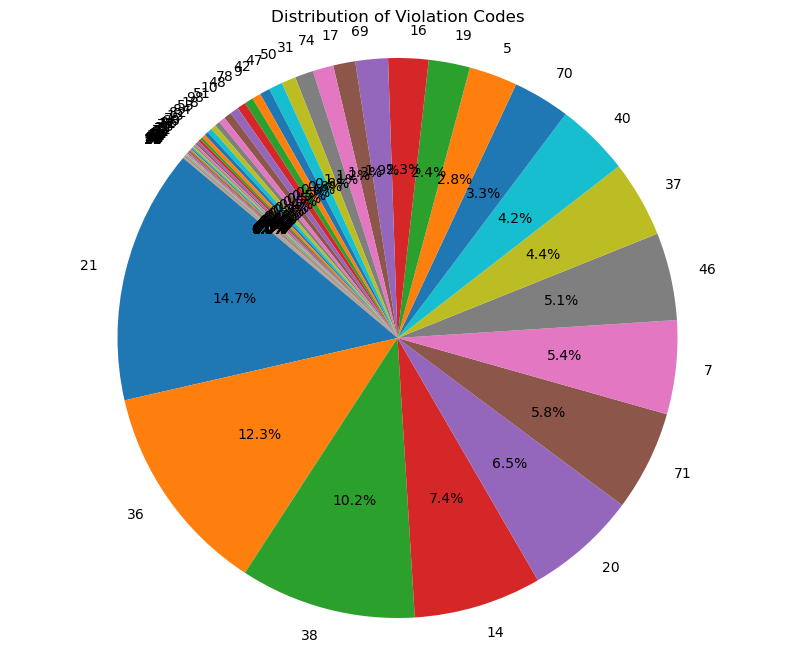

In [80]:
violation_code_counts = df_cleaned_2['Violation Code'].value_counts()

plt.figure(figsize=(10, 8))
violation_code_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Violation Codes')
plt.ylabel('')  
plt.axis('equal')  
plt.show()

It seems that the most common is violation code 21 (14.7%), which again indicates that there will be "Street Cleaning: No parking where parking is not allowed by sign, street marking or traffic control device." The second most observed violation code is 36 (12.3%), which is "Exceeding the posted speed limit in or near a designated school zone."

2. For my second visualization, I will be creating a bar graph that displays the `Registration State` on the x-axis and the `Vehicle Make` count for each state. I also created a legend on the side of the bar graph that displays the `Vehicle Make` by color. 

<Figure size 1400x800 with 0 Axes>

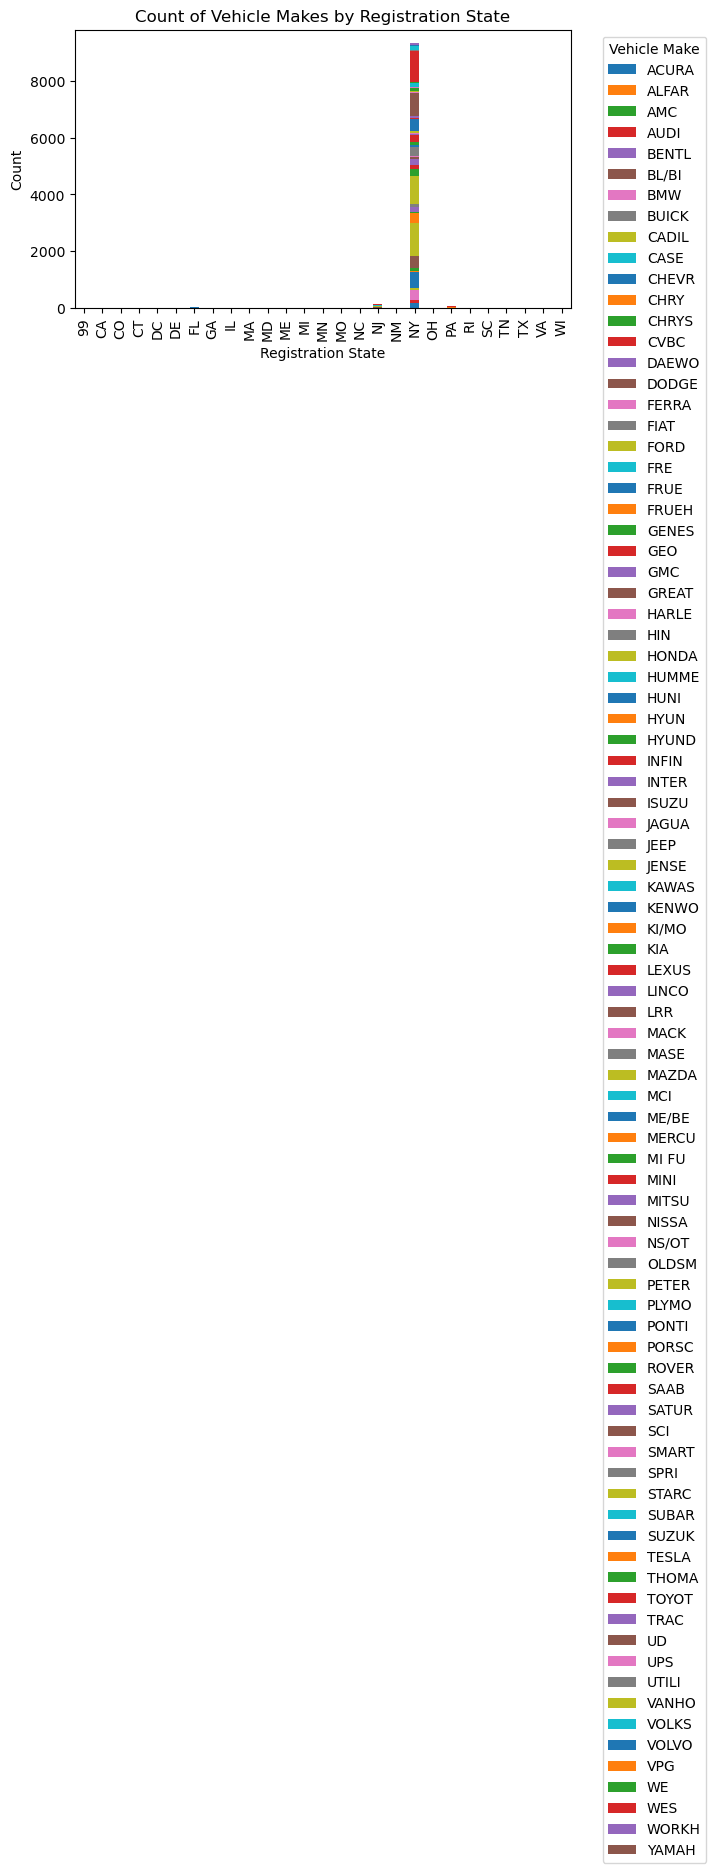

In [87]:
registration_vehicle_counts = df_cleaned_2.groupby(['Registration State', 'Vehicle Make']).size().reset_index(name='Count')

plt.figure(figsize=(14, 8))
registration_vehicle_counts.pivot(index='Registration State', columns='Vehicle Make', values='Count').plot(kind='bar', stacked=True)
plt.title('Count of Vehicle Makes by Registration State')
plt.xlabel('Registration State')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.legend(title='Vehicle Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(bottom=0.3) 
plt.show()

As you can see the majority of the cars who got parking violations are registered in NY, however, there are some other cars from NJ, PA and FL that received parking violations. 

3. For my third visualization, I will be creating a scatterplot that shows the counts from the column `Feet From Curb.` 

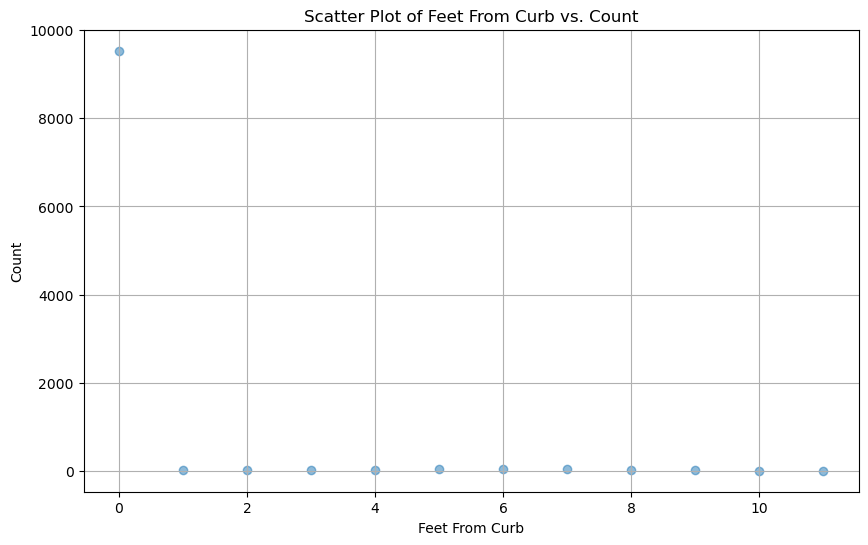

In [92]:
feet_from_curb_counts = df_cleaned_2['Feet From Curb'].value_counts()

plt.figure(figsize=(10, 6))
plt.scatter(feet_from_curb_counts.index, feet_from_curb_counts.values, alpha=0.5)
plt.title('Scatter Plot of Feet From Curb vs. Count')
plt.xlabel('Feet From Curb')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Here, we can see that the majority of the vehicles were marked at 0ft away from the curb, however, looking closely at the graph, we can see that there are some counts at around 1ft, 3ft, 5ft, 6ft, 7ft, etc. away from the curb as well. Since this data set is huge, the graph does not do a very good job at showing the counts for the `Feet From Curb`. 

4. For my fourth visualization, I will be creating another scatterplot that shows the counts from the column `Feet From Curb`. However, since the majority of the observations are marked as "0ft" away from the curb and it was difficult to get an understanding of how many cars were counted at 1ft, 2ft, 3ft, etc. away from the curb, I will be excluding 0ft from the curb this time. 

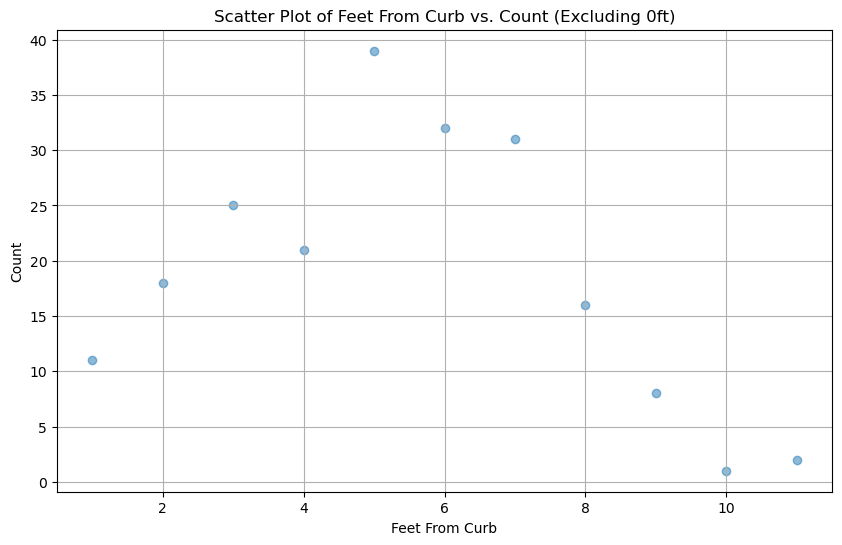

In [91]:
filtered_data = df_cleaned_2[df_cleaned_2['Feet From Curb'] != 0]

feet_from_curb_counts = filtered_data['Feet From Curb'].value_counts()

plt.figure(figsize=(10, 6))
plt.scatter(feet_from_curb_counts.index, feet_from_curb_counts.values, alpha=0.5)
plt.title('Scatter Plot of Feet From Curb vs. Count (Excluding 0ft)')
plt.xlabel('Feet From Curb')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Here, we can get a much better representation of how many cars were 1ft, 2ft, 3ft, etc. away from the curb. 

5. For my final visualization, I am interested in the `Plate ID` column. While looking at the observations that this column contains, I noticed that some license plates begin with numbers and others begin with letters. So, I want to find how many license plates begin with a number and how many begin with a letter and then plot this. 

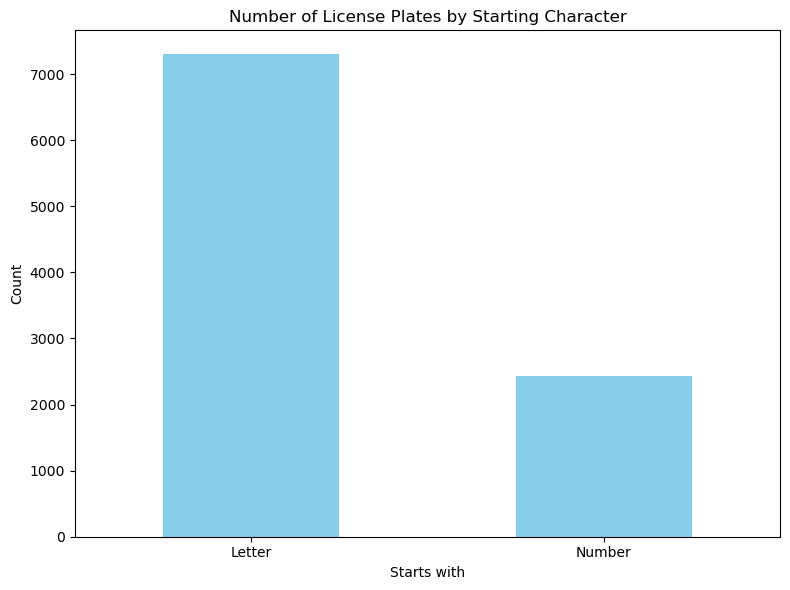

In [96]:
df_cleaned_2['First Character'] = df_cleaned_2['Plate ID'].str[0]

df_cleaned_2['Starts with'] = df_cleaned_2['First Character'].str.isdigit().map({True: 'Number', False: 'Letter'})

start_count = df_cleaned_2['Starts with'].value_counts()

plt.figure(figsize=(8, 6))
start_count.plot(kind='bar', color='skyblue')
plt.title('Number of License Plates by Starting Character')
plt.xlabel('Starts with')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

As you can see, there are many more license plates that begin with letters rather than numbers. 